In [1]:
'''In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.
Hint:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets'''

'In this assignment students have to transform iris data into 3 dimensions\nand plot a 3d chart with transformed dimensions and colour each data\npoint with specific class.\nHint:\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom mpl_toolkits.mplot3d import Axes3D\nfrom sklearn import decomposition\nfrom sklearn import datasets'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [3]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'


In [7]:
data=pd.read_table(url, header=None, sep=',')


In [8]:
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target']

In [9]:
df=data.copy()
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values

In [11]:

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])


In [12]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)


In [13]:
x_vals = finalDf['principal component 1']
y_vals = finalDf['principal component 2']
z_vals = finalDf['principal component 3']

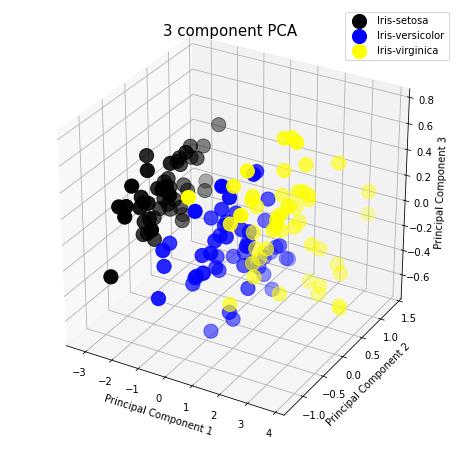

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
# Create the figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_zlabel('Principal Component 3', fontsize = 10)
ax.set_title('3 component PCA', fontsize = 15)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors=['black','blue','yellow']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 200)
ax.legend(targets)
ax.grid()
plt.show()